In [ ]:
import os
#eda
dataset_path = "/kaggle/input/glaucomadataset-healthy-and-infected-images/"
print(os.listdir(dataset_path))  # List all files in the dataset


In [ ]:
from PIL import Image
import os
import matplotlib.pyplot as plt
dataset_path = "/kaggle/input/glaucomadataset-healthy-and-infected-images/datasets combined"

# Subdirectories containing images
subdirs = ["glaucoma_project", "healthy"]

# Collect all image file paths from both subdirectories
image_files = []
for subdir in subdirs:
    subdir_path = os.path.join(dataset_path, subdir)
    image_files.extend(
        [os.path.join(subdir_path, f) for f in os.listdir(subdir_path) if os.path.isfile(os.path.join(subdir_path, f))]
    )
image =Image.open(os.path.join(dataset_path,image_files[0]))
red,green,blue, = image.split()
plt.hist(red.histogram(), bins=256, color='red', alpha=0.5)
plt.hist(green.histogram(), bins=256, color='green', alpha=0.5)
plt.hist(blue.histogram(), bins=256, color='blue', alpha=0.5)

plt.show()


In [1]:
import numpy as np

image =Image.open(os.path.join(dataset_path,image_files[0]))
red,green,blue = image.split()

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.hist(np.array(red).ravel(),bins=256, color='red', alpha=0.5)
plt.title('Red Channel')


plt.subplot(1,3,2)
plt.hist(np.array(green).ravel(),bins=256, color='green', alpha=0.5)
plt.title('green Channel')


plt.subplot(1,3,3)
plt.hist(np.array(blue).ravel(),bins=256, color='blue', alpha=0.5)
plt.title('blue Channel')

plt.show()

NameError: name 'Image' is not defined

In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Define dataset path
dataset_path= "/kaggle/input/glaucomadataset-healthy-and-infected-images/datasets combined"
# Get all image file paths
image_files = [ f for f in os.listdir(dataset_path) if f.endswith(('.jpg','.png'))]

# Lists to store image dimensions
widths = []
heights = []

# Loop through images and get their dimensions
for img_file in image_files:
    img_path = os.path.join(dataset_path, img_file)
    with Image.open(img_path) as img:
        widths.append(img.width)
        heights.append(img.height)

# Create a figure for boxplots
plt.figure(figsize=(10, 5))

# Boxplot for image widths
plt.subplot(1, 2, 1)
sns.boxplot(y=widths, color="skyblue")
plt.title("Boxplot of Image Widths")
plt.ylabel("Width (pixels)")

# Boxplot for image heights
plt.subplot(1, 2, 2)
sns.boxplot(y=heights, color="lightcoral")
plt.title("Boxplot of Image Heights")
plt.ylabel("Height (pixels)")

# Display the plots
plt.tight_layout()
plt.show()


FileNotFoundError: [WinError 3] The system cannot find the path specified: '/kaggle/input/glaucomadataset-healthy-and-infected-images/datasets combined'

In [ ]:
image_path="image_path/kaggle/input/glaucomadataset-healthy-and-infected-images/datasets combined/glaucoma_project/infected_c.jpg"


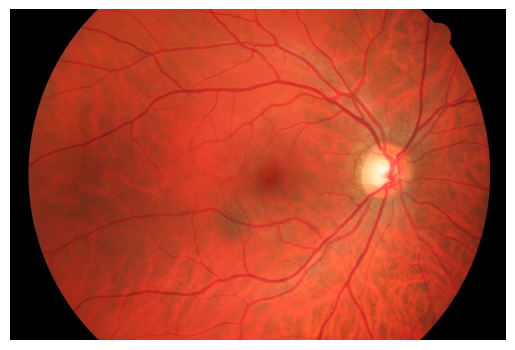

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
image_path="/kaggle/input/glaucomadataset-healthy-and-infected-images/datasets combined/healthy/01_h.jpg"
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

corrupted_images = []
for f in image_files:
    try:
        img = Image.open(os.path.join(dataset_path,f))
        img.verify()
    except Exception as e:
        corrupted_images.append(f)
        print(f"Corrupted image: {f}, Error: {e}")

print(f"Total corrupted images:{len(corrupted_images)}")

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Define dataset path
dataset_path= "/kaggle/input/glaucomadataset-healthy-and-infected-images/datasets combined"
# Get all image file paths
image_files = [ f for f in os.listdir(dataset_path) if f.endswith(('.jpg','.png'))]

# Lists to store image dimensions
widths = []
heights = []

# Loop through images and get their dimensions
for img_file in image_files:
    img_path = os.path.join(dataset_path, img_file)
    with Image.open(img_path) as img:
        widths.append(img.width)
        heights.append(img.height)

# Create a figure for boxplots
plt.figure(figsize=(10, 5))

# Boxplot for image widths
plt.subplot(1, 2, 1)
sns.boxplot(y=widths, color="skyblue")
plt.title("Boxplot of Image Widths")
plt.ylabel("Width (pixels)")

# Boxplot for image heights
plt.subplot(1, 2, 2)
sns.boxplot(y=heights, color="lightcoral")
plt.title("Boxplot of Image Heights")
plt.ylabel("Height (pixels)")

# Display the plots
plt.tight_layout()
plt.show()


In [ ]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

# Define dataset path
dataset_path= "/kaggle/input/glaucomadataset-healthy-and-infected-images/datasets combined"
image_files = [ f for f in os.listdir(dataset_path) if f.endswith(('.jpg','.png'))]

# Lists to store color intensity values
reds, green, blue = [], [], []

# Loop through images and extract RGB channel means
for img_file in image_files:
    img_path = os.path.join(dataset_path, img_file)
    with Image.open(img_path) as img:
        img = img.convert("RGB")  # Ensure the image is in RGB mode
        img_array = np.array(img)

        # Compute mean intensities for each channel
        reds.append(np.mean(img_array[:, :, 0]))  # Red channel mean
        green.append(np.mean(img_array[:, :, 1]))  # green channel mean
        blue.append(np.mean(img_array[:, :, 2]))  # blue channel mean

# Create a DataFrame for correlation analysis
import pandas as pd
color_data = pd.DataFrame({
    "Red": reds,
    "green": green,
    "blue": blue
})

# Compute correlation matrix
correlation_matrix = color_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Color Intensities")
plt.show()


In [ ]:
#T-SNE Visualization of Extracted Features
import cv2
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Extract ORB features from images
orb = cv2.ORB_create(nfeatures=500)
features = []

dataset_path= "/kaggle/input/glaucomadataset-healthy-and-infected-images/datasets combined"
image_files = [ f for f in os.listdir(dataset_path) if f.endswith(('.jpg','.png'))]
image_files = [os.path.join(dataset_path, f) for f in image_files]


for img_path in image_files[:100]:  # Limit for efficiency
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    keypoints, descriptors = orb.detectAndCompute(img, None)
    if descriptors is not None:
        features.append(descriptors.flatten())

# Ensure all feature vectors have the same length
min_length = min(len(f) for f in features)
features = np.array([f[:min_length] for f in features])

# Reduce dimensions using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)

# Plot PCA-reduced features
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1])
plt.title("PCA Visualization of Extracted Features")
plt.show()


In [ ]:
# Image Augmentation Samples


import os
import matplotlib.pyplot as plt
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
import numpy as np

# Define augmentation transformations
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.Rotate(limit=30, p=0.5)
])

dataset_path = "/kaggle/input/glaucomadataset-healthy-and-infected-images/datasets combined"
image_files = [f for f in os.listdir(dataset_path) if f.endswith(('.jpg', '.png'))]

# Ensure sample_images is defined
if 'sample_images' not in locals():
    sample_images = np.random.choice(image_files, 3, replace=False)

plt.figure(figsize=(12, 6))
for i, img_path in enumerate(sample_images[:3]):
    img_full_path = os.path.join(dataset_path, img_path)  # Construct full path to the image
    img = cv2.imread(img_full_path)
    
    if img is None:
        print(f"Error loading image: {img_full_path}")
        continue
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    augmented = transform(image=img_rgb)['image']

    plt.subplot(2, 3, i+1)
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title("Original")

    plt.subplot(2, 3, i+4)
    plt.imshow(augmented)
    plt.axis("off")
    plt.title("Augmented")

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np

# Load the image (assuming `sample_img` is an image array already)
image_path="/kaggle/input/glaucomadataset-healthy-and-infected-images/datasets combined/healthy_n.jpg"
sample_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale image

if sample_img is None:
    print(f"Error loading image: {image_path}")
else:
    # Create the heatmap
    plt.figure(figsize=(6, 5))
    
    # Use Seaborn's heatmap function to plot the pixel intensities
    sns.heatmap(sample_img, cmap='inferno', cbar=True, square=True, 
                xticklabels=False, yticklabels=False, annot=False)
    
    # Customize the plot
    plt.title("Heatmap of Pixel Intensities", fontsize=16)
    plt.xlabel("Width (Pixels)", fontsize=12)
    plt.ylabel("Height (Pixels)", fontsize=12)
    
    # Display the plot
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import cv2

img_contrast = cv2.convertScaleAbs(img, alpha=2.0, beta=0)
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_contrast, cv2.COLOR_BGR2RGB))
plt.title("Contrast Enhanced Image")
plt.axis("off")
plt.show()
